In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from datetime import datetime
%matplotlib inline

df = pd.read_csv('/Users/ericdenbin/Documents/flatiron_ds/2_phase/2_project/dsc-phase-2-project/data/kc_house_data.csv')
                 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.shape

(21597, 21)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


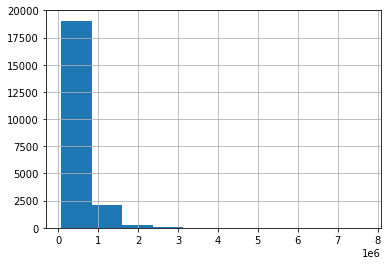

In [8]:
df['price'].hist();

In [9]:
df['basement'] = df['sqft_living'] - df['sqft_above']

df['basement'] = [1 if x > 0 else 0 for x in df["basement"]]

In [10]:
#df['basement'].value_counts()

In [11]:
df['basement'].map(lambda x:np.log(x))

<ipython-input-11-bcc18810e491>:1: RuntimeWarning: divide by zero encountered in log
  df['basement'].map(lambda x:np.log(x))


0       -inf
1        0.0
2       -inf
3        0.0
4       -inf
        ... 
21592   -inf
21593   -inf
21594   -inf
21595   -inf
21596   -inf
Name: basement, Length: 21597, dtype: float64

In [12]:
#north of the county is 1 and south is zero 


def label_lat (row):
    if row['lat'] >= 47.5000 :
        return 1
    else:
        return 0

In [13]:
def label_long (row):
    if row['long'] <= (-122.0000) :
        return 1
    else:
        return 0

In [14]:
df['county_lat'] = df.apply (lambda row: label_lat(row), axis=1)

In [15]:
df['county_long'] = df.apply (lambda row: label_long(row), axis=1)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(15762, 24)

In [18]:
df.round(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.721,-122.319,1690,7639,1,1,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.521,-122.393,1360,5000,1,1,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.617,-122.045,1800,7503,0,1,1
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,2001,0.0,98053,47.656,-122.005,4760,101930,1,1,1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1995,0.0,98003,47.310,-122.327,2238,6819,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,2008,0.0,98116,47.577,-122.409,1330,1265,1,1,1
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.699,-122.346,1530,1509,0,1,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.511,-122.362,1830,7200,0,1,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.594,-122.299,1020,2007,0,1,1


In [19]:
df = df.replace([np.inf, -np.inf], np.nan)

In [20]:
# 'View' is an ambiguous feature 
#'zipcode' is categorical data that would created 70 new columns if we created dummies
# 'yr_renovated' is ambiguous as well 
#'sqft_basement' is an odd datatype, and is a portion of sqft_living, and thus multicollinear.
 
df.drop(axis=1, columns=['view', 'zipcode', 'yr_renovated'], inplace=True)

In [21]:
#df['year'] = df['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").year)

In [22]:
df['yrs_old'] = 2021 - df['yr_built']

In [23]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
count,1.576200e+04,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,4.593364e+09,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,3.410862,7.663748,1792.775473,1971.111217,47.559177,-122.213520,1990.219579,12900.415556,0.392844,0.692996,0.931988,49.888783
std,2.876078e+09,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.651961,1.172238,828.403502,29.336823,0.138629,0.140706,684.142495,27977.230059,0.488398,0.461266,0.251774,29.336823
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,47.155900,-122.519000,399.000000,659.000000,0.000000,0.000000,0.000000,6.000000
25%,2.125159e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,1.000000,24.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,1975.000000,47.571000,-122.229000,1846.000000,7620.000000,0.000000,1.000000,1.000000,46.000000
75%,7.334501e+09,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,47.677400,-122.124000,2370.000000,10107.500000,1.000000,1.000000,1.000000,69.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,121.000000


In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,400.0,1951,47.7210,-122.319,1690,7639,1,1,1,70
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,910.0,1965,47.5208,-122.393,1360,5000,1,1,1,56
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,0.0,1987,47.6168,-122.045,1800,7503,0,1,1,34
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,...,1530.0,2001,47.6561,-122.005,4760,101930,1,1,1,20
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,...,?,1995,47.3097,-122.327,2238,6819,0,0,1,26


In [25]:
df.drop(axis=1,columns=['yr_built', 'id'], inplace=True)

In [26]:
df = df[df['bedrooms'] < 33]

In [27]:
df.dropna(inplace=True)
df.shape

(15761, 20)

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,47.7210,-122.319,1690,7639,1,1,1,70
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,47.5208,-122.393,1360,5000,1,1,1,56
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,47.6168,-122.045,1800,7503,0,1,1,34
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,47.6561,-122.005,4760,101930,1,1,1,20
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,47.3097,-122.327,2238,6819,0,0,1,26


In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
count,1.576100e+04,15761.000000,15761.00000,15761.000000,1.576100e+04,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000
mean,5.413109e+05,3.377070,2.12082,2084.541844,1.528141e+04,1.495178,0.007614,3.410761,7.663790,1792.823235,47.559169,-122.213512,1990.261468,12900.935854,0.392805,0.692976,0.931984,49.887253
std,3.722368e+05,0.905078,0.76679,918.639378,4.182414e+04,0.539354,0.086927,0.651859,1.172264,828.408080,0.138630,0.140708,684.143985,27978.041388,0.488390,0.461274,0.251781,29.337125
min,8.200000e+04,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,659.000000,0.000000,0.000000,0.000000,6.000000
25%,3.210000e+05,3.000000,1.75000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,1.000000,24.000000
50%,4.500000e+05,3.000000,2.25000,1920.000000,7.603000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,47.571000,-122.229000,1847.000000,7620.000000,0.000000,1.000000,1.000000,46.000000
75%,6.450000e+05,4.000000,2.50000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.677400,-122.124000,2370.000000,10108.000000,1.000000,1.000000,1.000000,69.000000
max,7.700000e+06,11.000000,8.00000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,121.000000


In [30]:
df.shape


(15761, 20)

In [31]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
price,1.000000,0.315150,0.526168,0.706205,0.084508,0.259528,0.274214,0.034332,0.664164,0.612046,0.306600,0.021229,0.581607,0.079407,0.174230,0.374225,0.013523,-0.049360
bedrooms,0.315150,1.000000,0.530373,0.593802,0.026772,0.188429,-0.005846,0.015686,0.367264,0.492025,-0.008042,0.135432,0.405796,0.026668,0.163436,0.003593,-0.012190,-0.160061
bathrooms,0.526168,0.530373,1.000000,0.753842,0.080356,0.505176,0.065686,-0.130238,0.664742,0.685672,0.029959,0.222736,0.569281,0.081976,0.164436,0.071022,-0.087006,-0.504831
sqft_living,0.706205,0.593802,0.753842,1.000000,0.165330,0.359391,0.111489,-0.062253,0.764246,0.876176,0.058426,0.239501,0.756674,0.176813,0.202247,0.095356,-0.093031,-0.314203
sqft_lot,0.084508,0.026772,0.080356,0.165330,1.000000,-0.009937,0.025981,-0.016004,0.108943,0.174208,-0.084293,0.231632,0.145384,0.718488,-0.034344,-0.101957,-0.207763,-0.051567
floors,0.259528,0.188429,0.505176,0.359391,-0.009937,1.000000,0.018377,-0.260927,0.459827,0.529076,0.058247,0.129727,0.281942,-0.013589,-0.255731,0.103462,-0.095865,-0.487027
waterfront,0.274214,-0.005846,0.065686,0.111489,0.025981,0.018377,1.000000,0.016471,0.083031,0.077162,-0.015930,-0.042329,0.090586,0.029635,0.041645,-0.009743,0.023662,0.024073
condition,0.034332,0.015686,-0.130238,-0.062253,-0.016004,-0.260927,0.016471,1.000000,-0.147752,-0.157852,-0.022399,-0.105717,-0.096208,-0.005094,0.127354,-0.014208,0.094461,0.366888
grade,0.664164,0.367264,0.664742,0.764246,0.108943,0.459827,0.083031,-0.147752,1.000000,0.758284,0.117463,0.200657,0.717024,0.116662,0.048041,0.171097,-0.054264,-0.443270
sqft_above,0.612046,0.492025,0.685672,0.876176,0.174208,0.529076,0.077162,-0.157852,0.758284,1.000000,0.009099,0.342003,0.732622,0.185493,-0.213558,0.036581,-0.151131,-0.418823


In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,47.7210,-122.319,1690,7639,1,1,1,70
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,47.5208,-122.393,1360,5000,1,1,1,56
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,47.6168,-122.045,1800,7503,0,1,1,34
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,47.6561,-122.005,4760,101930,1,1,1,20
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,47.3097,-122.327,2238,6819,0,0,1,26


In [33]:
df.shape

(15761, 20)

In [34]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
count,1.576100e+04,15761.000000,15761.00000,15761.000000,1.576100e+04,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000
mean,5.413109e+05,3.377070,2.12082,2084.541844,1.528141e+04,1.495178,0.007614,3.410761,7.663790,1792.823235,47.559169,-122.213512,1990.261468,12900.935854,0.392805,0.692976,0.931984,49.887253
std,3.722368e+05,0.905078,0.76679,918.639378,4.182414e+04,0.539354,0.086927,0.651859,1.172264,828.408080,0.138630,0.140708,684.143985,27978.041388,0.488390,0.461274,0.251781,29.337125
min,8.200000e+04,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,659.000000,0.000000,0.000000,0.000000,6.000000
25%,3.210000e+05,3.000000,1.75000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,1.000000,24.000000
50%,4.500000e+05,3.000000,2.25000,1920.000000,7.603000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,47.571000,-122.229000,1847.000000,7620.000000,0.000000,1.000000,1.000000,46.000000
75%,6.450000e+05,4.000000,2.50000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.677400,-122.124000,2370.000000,10108.000000,1.000000,1.000000,1.000000,69.000000
max,7.700000e+06,11.000000,8.00000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,121.000000


In [35]:
df.shape

(15761, 20)

In [36]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
count,1.576100e+04,15761.000000,15761.00000,15761.000000,1.576100e+04,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000
mean,5.413109e+05,3.377070,2.12082,2084.541844,1.528141e+04,1.495178,0.007614,3.410761,7.663790,1792.823235,47.559169,-122.213512,1990.261468,12900.935854,0.392805,0.692976,0.931984,49.887253
std,3.722368e+05,0.905078,0.76679,918.639378,4.182414e+04,0.539354,0.086927,0.651859,1.172264,828.408080,0.138630,0.140708,684.143985,27978.041388,0.488390,0.461274,0.251781,29.337125
min,8.200000e+04,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,659.000000,0.000000,0.000000,0.000000,6.000000
25%,3.210000e+05,3.000000,1.75000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,1.000000,24.000000
50%,4.500000e+05,3.000000,2.25000,1920.000000,7.603000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,47.571000,-122.229000,1847.000000,7620.000000,0.000000,1.000000,1.000000,46.000000
75%,6.450000e+05,4.000000,2.50000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.677400,-122.124000,2370.000000,10108.000000,1.000000,1.000000,1.000000,69.000000
max,7.700000e+06,11.000000,8.00000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,121.000000


In [37]:
non_normal = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'sqft_lot15', 'sqft_living15', 'yrs_old']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))


In [38]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
price,1.000000,0.343492,0.519614,0.675734,0.136243,0.314793,0.178340,0.034674,0.703151,0.589574,0.452925,0.053146,0.605145,0.122773,0.205234,0.519647,-0.010121,-0.131649
bedrooms,0.343492,1.000000,0.538285,0.650698,0.188050,0.196550,-0.013010,0.018035,0.383113,0.547551,-0.023078,0.156495,0.429056,0.170335,0.154394,-0.016939,-0.017558,-0.170845
bathrooms,0.519614,0.538285,1.000000,0.761175,0.080218,0.502493,0.047269,-0.117676,0.643278,0.683144,0.016137,0.241270,0.571179,0.078307,0.171160,0.049519,-0.085070,-0.532917
sqft_living,0.675734,0.650698,0.761175,1.000000,0.319670,0.372764,0.081824,-0.054966,0.744481,0.864977,0.044622,0.258591,0.748603,0.298830,0.234890,0.071629,-0.091756,-0.339681
sqft_lot,0.136243,0.188050,0.080218,0.319670,1.000000,-0.235797,0.081106,0.070094,0.180736,0.312020,-0.148995,0.377366,0.366443,0.917643,-0.052565,-0.216748,-0.205049,0.143854
floors,0.314793,0.196550,0.502493,0.372764,-0.235797,1.000000,0.018377,-0.260927,0.459827,0.552052,0.058340,0.129727,0.277415,-0.225624,-0.255731,0.103462,-0.095865,-0.589207
waterfront,0.178340,-0.013010,0.047269,0.081824,0.081106,0.018377,1.000000,0.016471,0.083031,0.060852,-0.015875,-0.042329,0.082380,0.087351,0.041645,-0.009743,0.023662,0.027075
condition,0.034674,0.018035,-0.117676,-0.054966,0.070094,-0.260927,0.016471,1.000000,-0.147752,-0.151002,-0.022403,-0.105717,-0.093859,0.080120,0.127354,-0.014208,0.094461,0.391236
grade,0.703151,0.383113,0.643278,0.744481,0.180736,0.459827,0.083031,-0.147752,1.000000,0.744526,0.117575,0.200657,0.691884,0.182247,0.048041,0.171097,-0.054264,-0.444517
sqft_above,0.589574,0.547551,0.683144,0.864977,0.312020,0.552052,0.060852,-0.151002,0.744526,1.000000,-0.009117,0.362163,0.713899,0.293626,-0.219470,0.008588,-0.148782,-0.454058


In [39]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
price,1.000000,0.343492,0.519614,0.675734,0.136243,0.314793,0.178340,0.034674,0.703151,0.589574,0.452925,0.053146,0.605145,0.122773,0.205234,0.519647,-0.010121,-0.131649
bedrooms,0.343492,1.000000,0.538285,0.650698,0.188050,0.196550,-0.013010,0.018035,0.383113,0.547551,-0.023078,0.156495,0.429056,0.170335,0.154394,-0.016939,-0.017558,-0.170845
bathrooms,0.519614,0.538285,1.000000,0.761175,0.080218,0.502493,0.047269,-0.117676,0.643278,0.683144,0.016137,0.241270,0.571179,0.078307,0.171160,0.049519,-0.085070,-0.532917
sqft_living,0.675734,0.650698,0.761175,1.000000,0.319670,0.372764,0.081824,-0.054966,0.744481,0.864977,0.044622,0.258591,0.748603,0.298830,0.234890,0.071629,-0.091756,-0.339681
sqft_lot,0.136243,0.188050,0.080218,0.319670,1.000000,-0.235797,0.081106,0.070094,0.180736,0.312020,-0.148995,0.377366,0.366443,0.917643,-0.052565,-0.216748,-0.205049,0.143854
floors,0.314793,0.196550,0.502493,0.372764,-0.235797,1.000000,0.018377,-0.260927,0.459827,0.552052,0.058340,0.129727,0.277415,-0.225624,-0.255731,0.103462,-0.095865,-0.589207
waterfront,0.178340,-0.013010,0.047269,0.081824,0.081106,0.018377,1.000000,0.016471,0.083031,0.060852,-0.015875,-0.042329,0.082380,0.087351,0.041645,-0.009743,0.023662,0.027075
condition,0.034674,0.018035,-0.117676,-0.054966,0.070094,-0.260927,0.016471,1.000000,-0.147752,-0.151002,-0.022403,-0.105717,-0.093859,0.080120,0.127354,-0.014208,0.094461,0.391236
grade,0.703151,0.383113,0.643278,0.744481,0.180736,0.459827,0.083031,-0.147752,1.000000,0.744526,0.117575,0.200657,0.691884,0.182247,0.048041,0.171097,-0.054264,-0.444517
sqft_above,0.589574,0.547551,0.683144,0.864977,0.312020,0.552052,0.060852,-0.151002,0.744526,1.000000,-0.009117,0.362163,0.713899,0.293626,-0.219470,0.008588,-0.148782,-0.454058


In [40]:
#pd.plotting.scatter_matrix(df, figsize=(20,20))
#plt.show();

# Model 1

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Set X and y
X_col = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'sqft_above', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X = df[X_col]
y = df['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)



[-3.66263120e-02  2.27941175e-02  1.75253304e-01  1.36162982e-02
  2.66994700e-02  5.56660135e-02  4.69654336e-02  1.93733248e-01
  1.17655688e-04  1.89242665e-01 -1.79286545e-02  7.77908975e-02
 -4.10869942e-02  7.85235340e-02]
13.04766146442349


In [42]:
# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

[13.51545655 12.61202344 12.23430018 ... 13.7130613  13.64675971
 13.07604824]
[12.47174399 13.80306292 13.15968194 ... 13.12801971 13.2288292
 12.55509776]


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

0.7524452505587023
0.7415559269167873


In [44]:
y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

192834.71421080397
222081.98039710653


In [45]:
import statsmodels.api as sm

# Prepare data
y = df['price']
X_col = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrs_old']
X = df[X_col]

#scaler = StandardScaler()

#X_scale = scaler.fit_transform(X)

# Using the sm.OLS() method, we need to manually add constant to the model
X = sm.add_constant(X)

# Create the model object
model = sm.OLS(y, X)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     3371.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:06   Log-Likelihood:                -1326.5
No. Observations:               15761   AIC:                             2683.
Df Residuals:                   15746   BIC:                             2798.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -260.1680      3.734    -69.671      0.000    -267.488    -252.848
bedrooms         -0.1226      0.010    -12.032      0.000      -0.143      -0.103
bathrooms         0.0629      0.010      6.474      0.000       0.044       0.082
sqft_living       0.4011      0.014     28.507      0.000       0.374       0.429
sqft_lot          0.0200      0.006      3.290      0.001       0.008       0.032
floors            0.0505      0.006      8.226      0.000       0.038       0.063
waterfront        0.6500      0.025     26.511      0.000       0.602       0.698
condition         0.0725      0.004     20.363      0.000       0.066       0.079
grade             0.1654      0.003     52.487      0.000       0.159       0.172
sqft_above        0.0119      0.013      0.932      0.351      -0.013       0.037
lat              64.9199      0.765     84.885      0.000      63.421      66.419
long             -0.1305      0.019     -7.022      0.000      -0.167      -0.094
sqft_living15     0.2423      0.011     22.445      0.000       0.221       0.263
sqft_lot15       -0.0531      0.007     -8.078      0.000      -0.066      -0.040
yrs_old           0.1119      0.005     24.527      0.000       0.103       0.121
==============================================================================
Omnibus:                      296.058   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.504
Skew:                           0.198   Prob(JB):                     1.23e-99
Kurtosis:                       3.733   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2

In [46]:
# Dropping sqft_above column as it was shown to be insignificant.

In [47]:
# Set X and y
X_col2 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X2 = df[X_col2]
y2 = df['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=11)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale2 = scaler.fit_transform(X_train2)
X_test_scale2 = scaler.fit_transform(X_test2)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale2, y_train2)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)



[-0.03445419  0.02222774  0.17096913  0.01956969  0.03026107  0.05544093
  0.04538261  0.19166404  0.18764923 -0.01835483  0.08397389 -0.04456366
  0.08217513]
13.04851151705166


In [48]:
# Make predictions
y_hat_train2 = result.predict(X_train_scale2)
y_hat_test2 = result.predict(X_test_scale2)

print(y_hat_train2)

print(y_hat_test2)

[13.07420005 12.63479658 13.49908752 ... 12.33013309 12.40042206
 13.64175069]
[12.54491497 13.33176871 13.24148731 ... 13.03378801 13.49079236
 12.76079714]


In [49]:
y_train_r2_2 = r2_score(y_train2, y_hat_train2)
print(y_train_r2_2)
y_test_r2_2 = r2_score(y_test2, y_hat_test2)
print(y_test_r2_2)

0.746584874248949
0.7589112625858001


In [50]:
y_train_rmse2 = mean_squared_error(np.exp(y_train2), np.exp(y_hat_train2), squared = False)
print(y_train_rmse2)
y_test_rmse2 = mean_squared_error(np.exp(y_test2), np.exp(y_hat_test2), squared = False)
print(y_test_rmse2)

196687.91779738286
211607.70555898958


In [51]:
#Prepare data
y2 = df['price']
X_col2 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X2 = df[X_col2]

scaler = StandardScaler()

X_scale2 = scaler.fit_transform(X2)

# Using the sm.OLS() method, we need to manually add constant to the model
X2 = sm.add_constant(X_scale2)

# Create the model object
model = sm.OLS(y2, X2)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     3630.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:07   Log-Likelihood:                -1326.9
No. Observations:               15761   AIC:                             2682.
Df Residuals:                   15747   BIC:                             2789.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6221.099      0.000      13.045      13.054
x1            -0.0344      0.003    -11.996      0.000      -0.040      -0.029
x2             0.0240      0.004      6.408      0.000       0.017       0.031
x3             0.1731      0.005     35.206      0.000       0.163       0.183
x4             0.0187      0.005      3.415      0.001       0.008       0.030
x5             0.0287      0.003      9.951      0.000       0.023       0.034
x6             0.0565      0.002     26.496      0.000       0.052       0.061
x7             0.0472      0.002     20.342      0.000       0.043       0.052
x8             0.1944      0.004     53.478      0.000       0.187       0.202
x9             0.1892      0.002     85.153      0.000       0.185       0.194
x10           -0.0179      0.003     -6.965      0.000      -0.023      -0.013
x11            0.0795      0.004     22.608      0.000       0.073       0.086
x12           -0.0433      0.005     -8.076      0.000      -0.054      -0.033
x13            0.0800      0.003     24.511      0.000       0.074       0.086
==============================================================================
Omnibus:                      298.586   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.110
Skew:                           0.199   Prob(JB):                    1.23e-100
Kurtosis:                       3.737   Cond. No.                         7.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 1

In [52]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 10)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[ True False  True False  True  True  True  True  True False  True  True
  True]
[1 2 1 3 1 1 1 1 1 4 1 1 1]


# Model 3 –– 10 features selected through RFE

In [53]:
y3 = df['price']
X_col3 = ['bedrooms',  
         'sqft_living', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X3 = df[X_col3]

# Perform split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=12)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale3 = scaler.fit_transform(X_train3)
X_test_scale3 = scaler.fit_transform(X_test3)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale3, y_train3)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-0.03350331  0.18657985  0.03045918  0.0569279   0.04825422  0.19903303
  0.18902417  0.07710912 -0.03460576  0.08263168]
13.048305670114944


In [54]:
# Make predictions
y_hat_train3 = result.predict(X_train_scale3)
y_hat_test3 = result.predict(X_test_scale3)

print(y_hat_train3)

print(y_hat_test3)

[13.01138307 13.51614675 12.38855272 ... 12.97801221 12.63038114
 14.05786079]
[12.64940849 12.575704   13.08295926 ... 12.54727408 13.14065799
 13.23168627]


In [55]:
y_train_r2_3 = r2_score(y_train3, y_hat_train3)
print(y_train_r2_3)
y_test_r2_3 = r2_score(y_test3, y_hat_test3)
print(y_test_r2_3)

0.7491432094815336
0.7458135642507364


In [56]:
y_train_rmse3 = mean_squared_error(np.exp(y_train3), np.exp(y_hat_train3), squared = False)
print(y_train_rmse3)
y_test_rmse3 = mean_squared_error(np.exp(y_test3), np.exp(y_hat_test3), squared = False)
print(y_test_rmse3)

197856.00982573445
212478.0580718334


In [57]:
y3 = df['price']
X_col3 = ['bedrooms', 
         'sqft_living',  
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X3 = df[X_col3]

scaler = StandardScaler()

X_scale3 = scaler.fit_transform(X3)

# Using the sm.OLS() method, we need to manually add constant to the model
X3 = sm.add_constant(X_scale3)

# Create the model object
model = sm.OLS(y3, X3)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     4683.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:07   Log-Likelihood:                -1373.7
No. Observations:               15761   AIC:                             2769.
Df Residuals:                   15750   BIC:                             2854.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6203.252      0.000      13.045      13.054
x1            -0.0322      0.003    -11.312      0.000      -0.038      -0.027
x2             0.1890      0.004     42.805      0.000       0.180       0.198
x3             0.0299      0.003     10.455      0.000       0.024       0.036
x4             0.0578      0.002     27.144      0.000       0.054       0.062
x5             0.0475      0.002     20.540      0.000       0.043       0.052
x6             0.1987      0.004     55.025      0.000       0.192       0.206
x7             0.1890      0.002     85.122      0.000       0.185       0.193
x8             0.0753      0.003     21.668      0.000       0.069       0.082
x9            -0.0355      0.003    -14.044      0.000      -0.040      -0.031
x10            0.0821      0.003     28.161      0.000       0.076       0.088
==============================================================================
Omnibus:                      343.358   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.242
Skew:                           0.226   Prob(JB):                    1.19e-115
Kurtosis:                       3.776   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 2

In [58]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 9)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[ True False  True False False  True  True  True  True False  True  True
  True]
[1 3 1 4 2 1 1 1 1 5 1 1 1]


# Model 4 –– 9 features selected through RFE

In [59]:
y4 = df['price']
X_col4 = ['bedrooms',  
         'sqft_living',  
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X4 = df[X_col4]

# Perform split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=13)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale4 = scaler.fit_transform(X_train4)
X_test_scale4 = scaler.fit_transform(X_test4)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale4, y_train4)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-0.03193714  0.19141005  0.05709657  0.04780826  0.2056916   0.19218178
  0.0761519  -0.04324408  0.07060645]
13.051866810690727


In [60]:
# Make predictions
y_hat_train4 = result.predict(X_train_scale4)
y_hat_test4 = result.predict(X_test_scale4)

print(y_hat_train4)

print(y_hat_test4)

[12.77561663 12.55431257 12.87214351 ... 12.6457792  12.97628757
 12.98888131]
[13.51649013 13.31290278 13.0867426  ... 13.0450078  13.19333453
 13.34392239]


In [61]:
y_train_r2_4 = r2_score(y_train4, y_hat_train4)
print(y_train_r2_4)
y_test_r2_4 = r2_score(y_test4, y_hat_test4)
print(y_test_r2_4)

0.7481238252578724
0.7413375827491324


In [62]:
y_train_rmse4 = mean_squared_error(np.exp(y_train4), np.exp(y_hat_train4), squared = False)
print(y_train_rmse4)
y_test_rmse4 = mean_squared_error(np.exp(y_test4), np.exp(y_hat_test4), squared = False)
print(y_test_rmse4)

197472.0616767928
210911.36229435704


In [63]:
y4 = df['price']
X_col4 = ['bedrooms', 
         'sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X4 = df[X_col4]

scaler = StandardScaler()

X_scale4 = scaler.fit_transform(X4)

# Using the sm.OLS() method, we need to manually add constant to the model
X4 = sm.add_constant(X_scale4)

# Create the model object
model = sm.OLS(y4, X4)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     5156.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:08   Log-Likelihood:                -1428.2
No. Observations:               15761   AIC:                             2876.
Df Residuals:                   15751   BIC:                             2953.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6182.035      0.000      13.045      13.054
x1            -0.0326      0.003    -11.410      0.000      -0.038      -0.027
x2             0.1947      0.004     44.255      0.000       0.186       0.203
x3             0.0585      0.002     27.386      0.000       0.054       0.063
x4             0.0461      0.002     19.923      0.000       0.042       0.051
x5             0.2048      0.004     57.228      0.000       0.198       0.212
x6             0.1901      0.002     85.379      0.000       0.186       0.194
x7             0.0743      0.003     21.307      0.000       0.067       0.081
x8            -0.0429      0.002    -17.637      0.000      -0.048      -0.038
x9             0.0700      0.003     26.072      0.000       0.065       0.075
==============================================================================
Omnibus:                      330.778   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.563
Skew:                           0.225   Prob(JB):                    3.32e-109
Kurtosis:                       3.747   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# I noticed that the r2 value decreased minimally with each of the last 2 features I removed.
# I'm going to start using only OLS models to check the r2 value for the rest of the features descending to 1.

# RFE 3

In [65]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 8)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False False  True False False  True  True  True  True False  True  True
  True]
[2 4 1 5 3 1 1 1 1 6 1 1 1]


# Model 5

In [66]:
y5 = df['price']
X_col5 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X5 = df[X_col5]

# Perform split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.25, random_state=13)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale5 = scaler.fit_transform(X_train5)
X_test_scale5 = scaler.fit_transform(X_test5)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale5, y_train5)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[ 0.16444872  0.05915168  0.04695773  0.21129766  0.19365682  0.07755472
 -0.04194503  0.06971227]
13.051866810690727


In [67]:
# Make predictions
y_hat_train5 = result.predict(X_train_scale5)
y_hat_test5 = result.predict(X_test_scale5)

print(y_hat_train5)

print(y_hat_test5)

[12.78437512 12.53605181 12.92326484 ... 12.6367916  12.95876248
 13.00689502]
[13.53021461 13.3154288  13.07929521 ... 13.01482257 13.20880699
 13.28227302]


In [68]:
y_train_r2_5 = r2_score(y_train5, y_hat_train5)
print(y_train_r2_5)
y_test_r2_5 = r2_score(y_test5, y_hat_test5)
print(y_test_r2_5)

0.7461048058599544
0.7390327482847387


In [69]:
y_train_rmse5 = mean_squared_error(np.exp(y_train5), np.exp(y_hat_train5), squared = False)
print(y_train_rmse5)
y_test_rmse5 = mean_squared_error(np.exp(y_test5), np.exp(y_hat_test5), squared = False)
print(y_test_rmse5)

198044.89395921532
212339.07606323535


In [70]:
y5 = df['price']
X_col5 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X5 = df[X_col5]

scaler = StandardScaler()

X_scale5 = scaler.fit_transform(X5)

# Using the sm.OLS() method, we need to manually add constant to the model
X5 = sm.add_constant(X_scale5)

# Create the model object
model = sm.OLS(y5, X5)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     5737.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:08   Log-Likelihood:                -1493.1
No. Observations:               15761   AIC:                             3004.
Df Residuals:                   15752   BIC:                             3073.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6156.837      0.000      13.045      13.054
x1             0.1667      0.004     45.447      0.000       0.160       0.174
x2             0.0605      0.002     28.310      0.000       0.056       0.065
x3             0.0452      0.002     19.470      0.000       0.041       0.050
x4             0.2109      0.004     59.372      0.000       0.204       0.218
x5             0.1915      0.002     85.835      0.000       0.187       0.196
x6             0.0760      0.003     21.726      0.000       0.069       0.083
x7            -0.0417      0.002    -17.080      0.000      -0.047      -0.037
x8             0.0693      0.003     25.718      0.000       0.064       0.075
==============================================================================
Omnibus:                      351.404   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.533
Skew:                           0.240   Prob(JB):                    7.62e-115
Kurtosis:                       3.755   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 4

In [71]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 7)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False False  True False False  True  True  True  True False  True False
  True]
[3 5 1 6 4 1 1 1 1 7 1 2 1]


# Model 6

In [72]:
y6 = df['price']
X_col6 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X6 = df[X_col6]

# Perform split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.25, random_state=13)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale6 = scaler.fit_transform(X_train6)
X_test_scale6 = scaler.fit_transform(X_test6)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale6, y_train6)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[ 0.16444872  0.05915168  0.04695773  0.21129766  0.19365682  0.07755472
 -0.04194503  0.06971227]
13.051866810690727


In [73]:
# Make predictions
y_hat_train6 = result.predict(X_train_scale6)
y_hat_test6 = result.predict(X_test_scale6)

print(y_hat_train6)

print(y_hat_test6)

[12.78437512 12.53605181 12.92326484 ... 12.6367916  12.95876248
 13.00689502]
[13.53021461 13.3154288  13.07929521 ... 13.01482257 13.20880699
 13.28227302]


In [74]:
y_train_r2_6 = r2_score(y_train6, y_hat_train6)
print(y_train_r2_6)
y_test_r2_6 = r2_score(y_test6, y_hat_test6)
print(y_test_r2_6)

0.7461048058599544
0.7390327482847387


In [75]:
y_train_rmse6 = mean_squared_error(np.exp(y_train6), np.exp(y_hat_train6), squared = False)
print(y_train_rmse5)
y_test_rmse6 = mean_squared_error(np.exp(y_test6), np.exp(y_hat_test6), squared = False)
print(y_test_rmse6)

198044.89395921532
212339.07606323535


In [76]:
y6 = df['price']
X_col6 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15',  
         'yrs_old']
X6 = df[X_col6]

scaler = StandardScaler()

X_scale6 = scaler.fit_transform(X6)

# Using the sm.OLS() method, we need to manually add constant to the model
X6 = sm.add_constant(X_scale6)

# Create the model object
model = sm.OLS(y6, X6)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     6397.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:09   Log-Likelihood:                -1637.7
No. Observations:               15761   AIC:                             3291.
Df Residuals:                   15753   BIC:                             3353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6100.797      0.000      13.045      13.054
x1             0.1607      0.004     43.617      0.000       0.153       0.168
x2             0.0590      0.002     27.367      0.000       0.055       0.063
x3             0.0452      0.002     19.265      0.000       0.041       0.050
x4             0.2131      0.004     59.497      0.000       0.206       0.220
x5             0.1995      0.002     90.572      0.000       0.195       0.204
x6             0.0594      0.003     17.524      0.000       0.053       0.066
x7             0.0575      0.003     21.869      0.000       0.052       0.063
==============================================================================
Omnibus:                      232.132   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.516
Skew:                           0.179   Prob(JB):                     6.24e-73
Kurtosis:                       3.615   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# The r2 value is continuing to decrease. I'm going to check one more model and switch strategies.

# RFE 5

In [78]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 6)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False False  True False False  True False  True  True False  True False
  True]
[4 6 1 7 5 1 2 1 1 8 1 3 1]


# Model 7

In [79]:
y7 = df['price']
X_col7 = ['sqft_living',   
         'waterfront',  
         'grade', 
         'lat',  
         'sqft_living15',  
         'yrs_old']
X7 = df[X_col7]

scaler = StandardScaler()

X_scale7 = scaler.fit_transform(X7)

# Using the sm.OLS() method, we need to manually add constant to the model
X7 = sm.add_constant(X_scale7)

# Create the model object
model = sm.OLS(y7, X7)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     7231.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:09   Log-Likelihood:                -1821.2
No. Observations:               15761   AIC:                             3656.
Df Residuals:                   15754   BIC:                             3710.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6030.367      0.000      13.045      13.054
x1             0.1678      0.004     45.253      0.000       0.161       0.175
x2             0.0589      0.002     27.018      0.000       0.055       0.063
x3             0.2119      0.004     58.489      0.000       0.205       0.219
x4             0.1964      0.002     88.365      0.000       0.192       0.201
x5             0.0566      0.003     16.517      0.000       0.050       0.063
x6             0.0765      0.002     31.057      0.000       0.072       0.081
==============================================================================
Omnibus:                      187.132   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.849
Skew:                           0.128   Prob(JB):                     1.03e-61
Kurtosis:                       3.601   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,400.0,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,910.0,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,0.0,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,1530.0,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,7.447168,?,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097


In [81]:
df.shape

(15761, 20)

In [82]:
df2 = df.copy()

In [83]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,400.0,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,910.0,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,0.0,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,1530.0,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,7.447168,?,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097


In [84]:
df2.shape

(15761, 20)

In [85]:
# Creating first interaction term
# Prioritizing features to create interaction terms from 
# by starting with those features left after performing RFE to get 6 

df2['sqft_waterfront'] = df2['sqft_living'] * df2['waterfront']

In [86]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,400.0,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495,0.0
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,910.0,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352,0.0
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,0.0,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361,0.0
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,1530.0,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732,0.0
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,...,?,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097,0.0


# Model 8 –– Best Model + First Interaction Term

In [87]:
# Set X and y
X_col8 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront']
X8 = df2[X_col8]
y8 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.25, random_state=14)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale8 = scaler.fit_transform(X_train8)
X_test_scale8 = scaler.fit_transform(X_test8)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale8, y_train8)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.03496632  0.02375031  0.17289789  0.01463463  0.02798613 -0.00543189
  0.04772167  0.19774013  0.19037163 -0.01795946  0.07794495 -0.04171372
  0.07800423  0.06288359]
13.051954430198842


In [88]:
# Make predictions
y_hat_train8 = result.predict(X_train_scale8)
y_hat_test8 = result.predict(X_test_scale8)

print(y_hat_train8)

print(y_hat_test8)

[13.13062169 13.16812602 12.91835021 ... 13.15594795 12.51706299
 13.45343468]
[12.77456843 12.76726807 12.63948914 ... 13.76600442 12.82651865
 12.72999584]


In [89]:
y_train_r2_8 = r2_score(y_train8, y_hat_train8)
print(y_train_r2_8)
y_test_r2_8 = r2_score(y_test8, y_hat_test8)
print(y_test_r2_8)

0.7517826291195837
0.743340093153985


In [90]:
y_train_rmse8 = mean_squared_error(np.exp(y_train8), np.exp(y_hat_train8), squared = False)
print(y_train_rmse8)
y_test_rmse8 = mean_squared_error(np.exp(y_test8), np.exp(y_hat_test8), squared = False)
print(y_test_rmse8)

200770.31728021722
190829.7870146096


In [91]:
y8 = df2['price']
X_col8 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront']
X8 = df2[X_col8]

scaler = StandardScaler()

X_scale8 = scaler.fit_transform(X8)

# Using the sm.OLS() method, we need to manually add constant to the model
X8 = sm.add_constant(X_scale8)

# Create the model object
model = sm.OLS(y8, X8)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     3372.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:10   Log-Likelihood:                -1325.4
No. Observations:               15761   AIC:                             2681.
Df Residuals:                   15746   BIC:                             2796.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6221.497      0.000      13.045      13.054
x1            -0.0345      0.003    -12.000      0.000      -0.040      -0.029
x2             0.0240      0.004      6.410      0.000       0.017       0.031
x3             0.1726      0.005     35.073      0.000       0.163       0.182
x4             0.0186      0.005      3.394      0.001       0.008       0.029
x5             0.0289      0.003     10.002      0.000       0.023       0.035
x6             0.0035      0.031      0.114      0.910      -0.056       0.063
x7             0.0472      0.002     20.368      0.000       0.043       0.052
x8             0.1941      0.004     53.301      0.000       0.187       0.201
x9             0.1891      0.002     85.124      0.000       0.185       0.193
x10           -0.0181      0.003     -7.034      0.000      -0.023      -0.013
x11            0.0797      0.004     22.658      0.000       0.073       0.087
x12           -0.0430      0.005     -8.005      0.000      -0.053      -0.032
x13            0.0799      0.003     24.465      0.000       0.073       0.086
x14            0.0531      0.031      1.737      0.082      -0.007       0.113
==============================================================================
Omnibus:                      298.633   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.056
Skew:                           0.199   Prob(JB):                    1.26e-100
Kurtosis:                       3.736   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
df2['sqft_house_neighbors'] = df2['sqft_living'] * df2['sqft_living15']

In [93]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495,0.0,58.357345
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352,0.0,54.696568
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361,0.0,55.666010
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732,0.0,72.806628
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,...,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097,0.0,57.442526


# Model 9 –– Best Model + Both Interaction Term

In [94]:
# Set X and y
X_col9 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront',
         'sqft_house_neighbors']
X9 = df2[X_col9]
y9 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.25, random_state=15)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale9 = scaler.fit_transform(X_train9)
X_test_scale9 = scaler.fit_transform(X_test9)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale9, y_train9)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.03404086  0.0308842  -0.20362621  0.02316047  0.02740071  0.04631779
  0.04832934  0.18922094  0.18770766 -0.01879815 -0.21356566 -0.04708091
  0.07587441  0.00974801  0.62340642]
13.047021616581263


In [95]:
# Make predictions
y_hat_train9 = result.predict(X_train_scale9)
y_hat_test9 = result.predict(X_test_scale9)

print(y_hat_train9)

print(y_hat_test9)

[13.705611   12.85585944 12.70836696 ... 13.10140922 12.3626412
 13.47029205]
[12.92787726 13.69639765 12.46976086 ... 12.46705122 12.40113069
 12.36935706]


In [96]:
y_train_r2_9 = r2_score(y_train9, y_hat_train9)
print(y_train_r2_9)
y_test_r2_9 = r2_score(y_test9, y_hat_test9)
print(y_test_r2_9)

0.7514683948428464
0.7492686842912553


In [97]:
y_train_rmse9 = mean_squared_error(np.exp(y_train9), np.exp(y_hat_train9), squared = False)
print(y_train_rmse9)
y_test_rmse9 = mean_squared_error(np.exp(y_test9), np.exp(y_hat_test9), squared = False)
print(y_test_rmse9)

194562.91691413708
200998.6426019894


In [98]:
y9 = df['price']
X_col9 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront',
         'sqft_house_neighbors']
X9 = df2[X_col9]

scaler = StandardScaler()

X_scale9 = scaler.fit_transform(X9)

# Using the sm.OLS() method, we need to manually add constant to the model
X9 = sm.add_constant(X_scale9)

# Create the model object
model = sm.OLS(y9, X9)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     3168.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:11   Log-Likelihood:                -1285.8
No. Observations:               15761   AIC:                             2604.
Df Residuals:                   15745   BIC:                             2726.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6236.956      0.000      13.045      13.054
x1            -0.0328      0.003    -11.434      0.000      -0.038      -0.027
x2             0.0282      0.004      7.492      0.000       0.021       0.036
x3            -0.2164      0.044     -4.924      0.000      -0.303      -0.130
x4             0.0189      0.005      3.449      0.001       0.008       0.030
x5             0.0282      0.003      9.795      0.000       0.023       0.034
x6             0.0230      0.031      0.753      0.451      -0.037       0.083
x7             0.0473      0.002     20.448      0.000       0.043       0.052
x8             0.1840      0.004     48.356      0.000       0.177       0.191
x9             0.1894      0.002     85.435      0.000       0.185       0.194
x10           -0.0190      0.003     -7.385      0.000      -0.024      -0.014
x11           -0.2245      0.034     -6.539      0.000      -0.292      -0.157
x12           -0.0443      0.005     -8.265      0.000      -0.055      -0.034
x13            0.0794      0.003     24.371      0.000       0.073       0.086
x14            0.0324      0.031      1.058      0.290      -0.028       0.092
x15            0.6539      0.073      8.908      0.000       0.510       0.798
==============================================================================
Omnibus:                      284.704   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.339
Skew:                           0.192   Prob(JB):                     1.78e-95
Kurtosis:                       3.719   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 10 –– Best model + 2nd interaction 

In [99]:
# Dropping the first interaction term because I just realized the first one was insignificant

In [100]:
# Set X and y
X_col10 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors']
X10 = df2[X_col10]
y10 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.25, random_state=16)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale10 = scaler.fit_transform(X_train10)
X_test_scale10 = scaler.fit_transform(X_test10)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale10, y_train10)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.03437828  0.02784112 -0.23587345  0.01969323  0.02824409  0.05490136
  0.04668441  0.18192189  0.18818625 -0.01998303 -0.24313868 -0.04388692
  0.07877729  0.6918455 ]
13.052337812741186


In [101]:
# Make predictions
y_hat_train10 = result.predict(X_train_scale10)
y_hat_test10 = result.predict(X_test_scale10)

print(y_hat_train10)

print(y_hat_test10)

[12.81697003 13.10722616 13.36983845 ... 13.17273788 12.73556136
 13.42508686]
[13.43555524 12.88635142 13.0098697  ... 13.08772618 12.61918383
 13.14145976]


In [102]:
y_train_r2_10 = r2_score(y_train10, y_hat_train10)
print(y_train_r2_10)
y_test_r2_10 = r2_score(y_test10, y_hat_test10)
print(y_test_r2_10)

0.7499268673538653
0.7540377684848983


In [103]:
y_train_rmse10 = mean_squared_error(np.exp(y_train10), np.exp(y_hat_train10), squared = False)
print(y_train_rmse10)
y_test_rmse10 = mean_squared_error(np.exp(y_test10), np.exp(y_hat_test10), squared = False)
print(y_test_rmse10)

192059.77901514148
204763.36512334138


In [104]:
y10 = df['price']
X_col10 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors']
X10 = df2[X_col10]

scaler = StandardScaler()

X_scale10 = scaler.fit_transform(X10)

# Using the sm.OLS() method, we need to manually add constant to the model
X10 = sm.add_constant(X_scale10)

# Create the model object
model = sm.OLS(y10, X10)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     3394.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:12   Log-Likelihood:                -1286.4
No. Observations:               15761   AIC:                             2603.
Df Residuals:                   15746   BIC:                             2718.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6236.932      0.000      13.045      13.054
x1            -0.0328      0.003    -11.427      0.000      -0.038      -0.027
x2             0.0283      0.004      7.501      0.000       0.021       0.036
x3            -0.2196      0.044     -5.010      0.000      -0.306      -0.134
x4             0.0190      0.005      3.463      0.001       0.008       0.030
x5             0.0281      0.003      9.765      0.000       0.022       0.034
x6             0.0553      0.002     25.984      0.000       0.051       0.059
x7             0.0473      0.002     20.434      0.000       0.043       0.052
x8             0.1841      0.004     48.411      0.000       0.177       0.192
x9             0.1894      0.002     85.461      0.000       0.185       0.194
x10           -0.0189      0.003     -7.348      0.000      -0.024      -0.014
x11           -0.2274      0.034     -6.644      0.000      -0.295      -0.160
x12           -0.0445      0.005     -8.314      0.000      -0.055      -0.034
x13            0.0795      0.003     24.400      0.000       0.073       0.086
x14            0.6599      0.073      9.014      0.000       0.516       0.803
==============================================================================
Omnibus:                      284.624   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.230
Skew:                           0.192   Prob(JB):                     1.88e-95
Kurtosis:                       3.719   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495,0.0,58.357345
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352,0.0,54.696568
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361,0.0,55.666010
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732,0.0,72.806628
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,...,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097,0.0,57.442526


In [106]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,7.682482,400.0,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,6.956545,910.0,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,7.426549,0.0,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,8.266164,1530.0,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,7.447168,?,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097


In [107]:
df2['month'] = df2['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").month)

df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors,month
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,-122.319,7.432484,8.941022,1,1,1,4.248495,0.0,58.357345,12
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,-122.393,7.215240,8.517193,1,1,1,4.025352,0.0,54.696568,12
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,-122.045,7.495542,8.923058,0,1,1,3.526361,0.0,55.666010,2
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,-122.005,8.468003,11.532042,1,1,1,2.995732,0.0,72.806628,5
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,...,-122.327,7.713338,8.827468,0,0,1,3.258097,0.0,57.442526,6


In [108]:
seasons = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

month_to_season = dict(zip(range(1,13), seasons))

def season(month):
    
    return month_to_season[month] 


In [109]:
# Engineering season feature

df2['season'] = df2['month'].map(lambda x: int(season(x)))

In [110]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors,month,season
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,7.432484,8.941022,1,1,1,4.248495,0.0,58.357345,12,4
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,7.215240,8.517193,1,1,1,4.025352,0.0,54.696568,12,4
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,7.495542,8.923058,0,1,1,3.526361,0.0,55.666010,2,1
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,8.468003,11.532042,1,1,1,2.995732,0.0,72.806628,5,2
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,...,7.713338,8.827468,0,0,1,3.258097,0.0,57.442526,6,2


In [111]:
# Creating dummies out of season feature
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
ohe = OneHotEncoder(drop='first')

# Transform the data into dummies
trans = ohe.fit_transform(df2[['season']])

# Store the dummies matrix and name vector
data = trans.todense()
names = ohe.get_feature_names()

# Concatenate the dummies df to the original dataset
dummies = pd.DataFrame(data, columns=names)

print(dummies)

df2 = df2.join(dummies)
df2.head()

       x0_2  x0_3  x0_4
0       0.0   0.0   1.0
1       0.0   0.0   1.0
2       0.0   0.0   0.0
3       1.0   0.0   0.0
4       1.0   0.0   0.0
...     ...   ...   ...
15756   0.0   0.0   0.0
15757   1.0   0.0   0.0
15758   0.0   0.0   0.0
15759   1.0   0.0   0.0
15760   0.0   0.0   1.0

[15761 rows x 3 columns]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors,month,season,x0_2,x0_3,x0_4
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,1,1,4.248495,0.0,58.357345,12,4,0.0,0.0,1.0
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,1,1,4.025352,0.0,54.696568,12,4,1.0,0.0,0.0
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,1,1,3.526361,0.0,55.666010,2,1,1.0,0.0,0.0
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,1,1,2.995732,0.0,72.806628,5,2,1.0,0.0,0.0
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,...,0,1,3.258097,0.0,57.442526,6,2,0.0,0.0,0.0


In [112]:
df2.shape

(15761, 27)

In [113]:
df2.dropna(inplace=True)



In [114]:
df2.shape

(11534, 27)

In [115]:
df2['x0_2'] = df2['x0_2'].map(lambda x:int(x))

In [116]:
df2['x0_3'] = df2['x0_3'].map(lambda x:int(x))

In [117]:
df2['x0_4'] = df2['x0_4'].map(lambda x:int(x))

# Model 11 –– Best model + 2nd interaction terms + dummy variable for seasons

In [118]:
# Set X and y
X_col11 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'x0_2',
         'x0_3',
         'x0_4',
         'basement' ]
X11 = df2[X_col11]
y11 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.25, random_state=30)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale11 = scaler.fit_transform(X_train11)
#X_test_scale11 = scaler.fit_transform(X_test11)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train11, y_train11)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-1.00677310e-01  9.02570042e-02 -8.49082527e-01  2.30657767e-02
  7.20382086e-02  6.48866185e-01  7.13149304e-02  1.53106395e-01
  6.33895345e+01 -9.26817961e-02 -9.24006276e-01 -5.90853060e-02
  1.55309554e-01  1.60809686e-01  2.26283727e-03  8.62375359e-03
 -5.19458154e-03  2.20756257e-02]
-240.62368847798615


In [119]:
# Make predictions
y_hat_train11 = result.predict(X_train11)
y_hat_test11 = result.predict(X_test11)

print(y_hat_train11)

print(y_hat_test11)

[12.53871865 12.90547396 13.14905875 ... 13.31669784 12.92018823
 13.50665739]
[13.69963312 13.51151195 12.96830571 ... 13.27059346 13.92717903
 12.68981499]


In [120]:
y_train_r2_11 = r2_score(y_train11, y_hat_train11)
print(y_train_r2_11)
y_test_r2_11 = r2_score(y_test11, y_hat_test11)
print(y_test_r2_11)

0.7576742663960016
0.7413310366134034


In [121]:
y_train_rmse11 = mean_squared_error(np.exp(y_train11), np.exp(y_hat_train11), squared = False)
print(y_train_rmse11)
y_test_rmse11 = mean_squared_error(np.exp(y_test11), np.exp(y_hat_test11), squared = False)
print(y_test_rmse11)

188434.78564401
199534.4055592267


In [122]:
#'sqft_house_neighbors',

# Using the sm.OLS() method, we need to manually add constant to the model
X_train11 = sm.add_constant(X_train11)

# Create the model object
model = sm.OLS(y_train11, X_train11)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1499.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:14   Log-Likelihood:                -630.25
No. Observations:                8650   AIC:                             1299.
Df Residuals:                    8631   BIC:                             1433.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -240.6237      5.112    -47.073      0.000    -250.644    -230.604
bedrooms                -0.1007      0.013     -7.471      0.000      -0.127      -0.074
bathrooms                0.0903      0.013      6.927      0.000       0.065       0.116
sqft_living             -0.8491      0.141     -6.039      0.000      -1.125      -0.573
sqft_lot                 0.0231      0.008      2.858      0.004       0.007       0.039
floors                   0.0720      0.008      8.931      0.000       0.056       0.088
waterfront               0.6489      0.031     20.624      0.000       0.587       0.711
condition                0.0713      0.005     15.807      0.000       0.062       0.080
grade                    0.1531      0.004     34.564      0.000       0.144       0.162
lat                     63.3895      1.018     62.292      0.000      61.395      65.384
long                    -0.0927      0.026     -3.633      0.000      -0.143      -0.043
sqft_living15           -0.9240      0.141     -6.555      0.000      -1.200      -0.648
sqft_lot15              -0.0591      0.009     -6.694      0.000      -0.076      -0.042
yrs_old                  0.1553      0.007     22.109      0.000       0.142       0.169
sqft_house_neighbors     0.1608      0.019      8.642      0.000       0.124       0.197
x0_2                     0.0023      0.008      0.276      0.783      -0.014       0.018
x0_3                     0.0086      0.008      1.026      0.305      -0.008       0.025
x0_4                    -0.0052      0.009     -0.590      0.555      -0.022       0.012
basement                 0.0221      0.007      3.009      0.003       0.008       0.036
==============================================================================
Omnibus:                      212.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.208
Skew:                           0.241   Prob(JB):                     1.62e-73
Kurtosis:                       3.836   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 12 –– Best model + 2nd, 3rd, & 4th interaction terms

In [123]:
df2['sqft_age'] = df2['sqft_living'] * df2['yrs_old']

df2['sqft_grade'] = df2['sqft_living'] * df2['grade'] 

df2['sqft15_grade'] = df2['sqft_living15'] * df2['grade']

In [124]:
# Set X and y
X_col12 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_age',
         'sqft_grade',
         'basement',
         'county_lat',
         'county_long',
         'sqft15_grade']
X12 = df2[X_col12]
y12 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.25, random_state=29)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale12 = scaler.fit_transform(X_train12)
#X_test_scale12 = scaler.fit_transform(X_test12)


# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train12, y_train12)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-8.90043906e-02  7.59711318e-02 -1.15996625e+00  2.26716764e-02
  5.95029866e-02  6.20909730e-01  7.45473594e-02  3.65923158e-01
  2.02537125e+01 -1.06570408e-01  1.80951082e-01 -3.02530375e-02
  1.67673107e-01  1.24944975e-01 -5.58647022e-03  8.49736806e-02
  3.47359841e-03  3.50382549e-01  7.45438628e-03 -1.15515276e-01]
-79.92741172479487


In [125]:
# Make predictions
y_hat_train12 = result.predict(X_train12)
y_hat_test12 = result.predict(X_test12)

print(y_hat_train12)

print(y_hat_test12)

[12.56766199 13.47925155 12.8779248  ... 13.10046961 12.58268441
 12.38593785]
[12.7896934  12.77530736 13.01541577 ... 12.26430096 13.22121016
 13.40405191]


In [126]:
y_train_r2_12 = r2_score(y_train12, y_hat_train12)
print(y_train_r2_12)
y_test_r2_12 = r2_score(y_test12, y_hat_test12)
print(y_test_r2_12)

0.7820722707157
0.7912244093160133


In [127]:
y_train_rmse12 = mean_squared_error(np.exp(y_train12), np.exp(y_hat_train12), squared = False)
print(y_train_rmse12)
y_test_rmse12 = mean_squared_error(np.exp(y_test12), np.exp(y_hat_test12), squared = False)
print(y_test_rmse12)

177706.91270435072
180389.8808045337


In [128]:


# Using the sm.OLS() method, we need to manually add constant to the model
X_train12 = sm.add_constant(X_train12)

# Create the model object
model = sm.OLS(y_train12, X_train12)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1548.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:14   Log-Likelihood:                -159.00
No. Observations:                8650   AIC:                             360.0
Df Residuals:                    8629   BIC:                             508.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -79.9274      7.407    -10.790      0.000     -94.448     -65.407
bedrooms                -0.0890      0.013     -6.917      0.000      -0.114      -0.064
bathrooms                0.0760      0.013      6.051      0.000       0.051       0.101
sqft_living             -1.1600      0.237     -4.895      0.000      -1.624      -0.695
sqft_lot                 0.0227      0.008      2.911      0.004       0.007       0.038
floors                   0.0595      0.008      7.777      0.000       0.045       0.075
waterfront               0.6209      0.031     20.352      0.000       0.561       0.681
condition                0.0745      0.004     17.260      0.000       0.066       0.083
grade                    0.3659      0.081      4.540      0.000       0.208       0.524
lat                     20.2537      1.673     12.109      0.000      16.975      23.533
long                    -0.1066      0.029     -3.708      0.000      -0.163      -0.050
sqft_living15            0.1810      0.196      0.921      0.357      -0.204       0.566
sqft_lot15              -0.0303      0.009     -3.539      0.000      -0.047      -0.013
yrs_old                  0.1677      0.099      1.691      0.091      -0.027       0.362
sqft_house_neighbors     0.1249      0.031      4.080      0.000       0.065       0.185
sqft_age                -0.0056      0.013     -0.432      0.666      -0.031       0.020
sqft_grade               0.0850      0.008     10.988      0.000       0.070       0.100
basement                 0.0035      0.007      0.487      0.626      -0.010       0.017
county_lat               0.3504      0.011     31.406      0.000       0.329       0.372
county_long              0.0075      0.014      0.539      0.590      -0.020       0.035
sqft15_grade            -0.1155      0.012     -9.722      0.000      -0.139      -0.092
==============================================================================
Omnibus:                      156.303   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.538
Skew:                           0.094   Prob(JB):                     9.04e-66
Kurtosis:                       3.892   Cond. No.                     4.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
#df2.drop(axis=1,columns=['date','month','season','x0_2','x0_3','x0_4'],inplace=True)

In [130]:
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_waterfront,sqft_house_neighbors,month,season,x0_2,x0_3,x0_4,sqft_age,sqft_grade,sqft15_grade
1,12/9/2014,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,0.0,3,7,...,0.0,58.357345,12,4,0,0,1,33.357745,54.961628,52.027387
3,12/9/2014,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,0.0,5,7,...,0.0,54.696568,12,4,1,0,0,30.514983,53.064898,50.506680
4,2/18/2015,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,0.0,3,8,...,0.0,55.666010,2,1,1,0,0,26.188689,59.412393,59.964336
5,5/12/2014,14.022525,1.386294,1.504077,8.597851,11.532042,1.0,0.0,3,11,...,0.0,72.806628,5,2,1,0,0,25.756860,94.576362,93.148032
6,6/27/2014,12.458775,1.098612,0.810930,7.447168,8.827468,2.0,0.0,3,7,...,0.0,57.442526,6,2,0,0,0,24.263593,52.130179,53.993365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,1/9/2015,13.161584,1.098612,0.559616,7.339538,8.930362,1.0,0.0,3,8,...,0.0,53.868814,1,1,0,0,0,29.674127,58.716302,58.716302
15757,6/23/2014,13.527828,1.098612,0.693147,7.506592,8.517193,1.5,0.0,4,8,...,0.0,57.840260,6,2,1,0,0,32.894085,60.052734,61.642100
15758,4/7/2015,13.658857,1.609438,0.405465,7.565275,8.411833,1.5,0.0,3,8,...,0.0,57.810539,4,2,0,0,0,34.208575,60.522202,61.132516
15759,10/2/2014,12.524526,1.386294,0.000000,7.265430,10.209243,1.5,0.0,4,5,...,0.0,54.774271,10,4,1,0,0,32.446742,36.327149,37.695135


In [131]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,sqft_waterfront,sqft_house_neighbors,month,season,x0_2,x0_3,x0_4,sqft_age,sqft_grade,sqft15_grade
price,1.000000,0.336343,0.513345,0.671200,0.140037,0.330813,0.193360,0.053797,0.696232,0.585217,...,0.199783,0.695174,-0.017557,-0.018919,0.011119,0.010993,-0.016654,0.131510,0.728264,0.713648
bedrooms,0.336343,1.000000,0.541307,0.641466,0.173504,0.222327,-0.003389,0.021104,0.382272,0.531241,...,0.001429,0.575220,-0.009122,-0.011527,0.015610,0.002222,0.004370,0.049521,0.462180,0.403857
bathrooms,0.513345,0.541307,1.000000,0.768409,0.126126,0.497778,0.061405,-0.082974,0.636204,0.681815,...,0.067062,0.731269,0.009119,0.008554,0.017116,-0.004137,-0.009142,-0.267608,0.695314,0.649180
sqft_living,0.671200,0.641466,0.768409,1.000000,0.322787,0.413244,0.097711,-0.042046,0.748006,0.855046,...,0.105435,0.949030,0.008800,0.007779,0.016201,0.001239,-0.011155,-0.008678,0.849724,0.782268
sqft_lot,0.140037,0.173504,0.126126,0.322787,1.000000,-0.129582,0.076975,0.021224,0.225710,0.331945,...,0.077657,0.370923,0.001769,0.002397,-0.003938,-0.002469,0.016490,0.109950,0.272097,0.275352
floors,0.330813,0.222327,0.497778,0.413244,-0.129582,1.000000,0.033535,-0.219552,0.462474,0.600982,...,0.035736,0.400838,0.012678,0.012885,0.014449,0.008082,-0.010862,-0.414179,0.469116,0.451213
waterfront,0.193360,-0.003389,0.061405,0.097711,0.076975,0.033535,1.000000,0.014520,0.098820,0.075514,...,0.997587,0.105836,0.015627,0.015352,-0.007185,0.001369,0.004113,0.054318,0.109557,0.105670
condition,0.053797,0.021104,-0.082974,-0.042046,0.021224,-0.219552,0.014520,1.000000,-0.126013,-0.138351,...,0.013081,-0.067658,0.016882,0.013648,-0.010647,0.010563,0.013803,0.365857,-0.109870,-0.123137
grade,0.696232,0.382272,0.636204,0.748006,0.225710,0.462474,0.098820,-0.126013,1.000000,0.749705,...,0.106274,0.789577,0.009030,0.006551,0.009397,0.009521,-0.011976,-0.195997,0.983621,0.986859
sqft_above,0.585217,0.531241,0.681815,0.855046,0.331945,0.600982,0.075514,-0.138351,0.749705,1.000000,...,0.082515,0.847039,0.010642,0.011254,0.023012,0.001518,-0.015406,-0.191335,0.815302,0.777840


# Model 13 –– being very strict about multicollinearity

In [132]:
df2.shape

(11534, 30)

In [133]:
df2.dropna(inplace=True)

In [134]:
df2.shape

(11534, 30)

In [135]:
#df2['basement'].hist()

In [136]:
#df2['basement'] = df2['basement'].map(lambda x: np.log(x))

In [137]:
# Set X and y
X_col13 = ['sqft_lot',  
           'waterfront', 
           'condition',  
           'lat', 
           'long',  
           'sqft_lot15', 
           'sqft_grade',
           'sqft_waterfront']
X13 = df2[X_col13]
y13 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train13, X_test13, y_train13, y_test13 = train_test_split(X13, y13, test_size=0.25, random_state=21)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale13 = scaler.fit_transform(X_train13)
#X_test_scale13 = scaler.fit_transform(X_test13)


# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train13, y_train13)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[ 5.50291493e-02  3.68056138e-01  1.05152655e-01  6.92989313e+01
 -1.89509173e-01 -5.49567539e-02  3.15775965e-02  4.51241042e-02]
-279.9467194369387


In [138]:
# Make predictions
y_hat_train13 = result.predict(X_train13)
y_hat_test13 = result.predict(X_test13)

print(y_hat_train13)

print(y_hat_test13)

[12.76174715 12.93654135 13.02304517 ... 12.47082297 12.6979222
 12.5111616 ]
[12.78689678 12.9801428  13.27182618 ... 12.3544275  12.93542367
 14.08895358]


In [139]:
y_train_r2_13 = r2_score(y_train13, y_hat_train13)
print(y_train_r2_13)
y_test_r2_13 = r2_score(y_test13, y_hat_test13)
print(y_test_r2_13)

0.719675343573763
0.7013924749830149


In [140]:
y_train_rmse13 = mean_squared_error(np.exp(y_train13), np.exp(y_hat_train13), squared = False)
print(y_train_rmse13)
y_test_rmse13 = mean_squared_error(np.exp(y_test13), np.exp(y_hat_test13), squared = False)
print(y_test_rmse13)

208242.5671741326
209867.17391963318


In [141]:


# Using the sm.OLS() method, we need to manually add constant to the model
X_train13 = sm.add_constant(X_train13)

# Create the model object
model = sm.OLS(y_train13, X_train13)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     2773.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:16   Log-Likelihood:                -1266.6
No. Observations:                8650   AIC:                             2551.
Df Residuals:                    8641   BIC:                             2615.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -279.9467      4.830    -57.965      0.000    -289.414    -270.480
sqft_lot            0.0550      0.009      6.466      0.000       0.038       0.072
waterfront          0.3681      0.479      0.768      0.443      -0.572       1.308
condition           0.1052      0.005     23.218      0.000       0.096       0.114
lat                69.2989      1.058     65.487      0.000      67.225      71.373
long               -0.1895      0.024     -7.780      0.000      -0.237      -0.142
sqft_lot15         -0.0550      0.009     -5.832      0.000      -0.073      -0.036
sqft_grade          0.0316      0.000    113.035      0.000       0.031       0.032
sqft_waterfront     0.0451      0.060      0.753      0.451      -0.072       0.163
==============================================================================
Omnibus:                      156.897   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.318
Skew:                           0.250   Prob(JB):                     5.23e-44
Kurtosis:                       3.550   Cond. No.                     2.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 14 –– Best model + 2nd, 3rd, & 4th interactions terms + dummy variables

In [142]:
# Set X and y
X_col14 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_age',
         'sqft_grade',
         'x0_2',
         'x0_3',
         'x0_4',
         'county_lat',
         'county_long']
X14 = df2[X_col14]
y14 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train14, X_test14, y_train14, y_test14 = train_test_split(X14, y14, test_size=0.25, random_state=19)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale14 = scaler.fit_transform(X_train14)
#X_test_scale14 = scaler.fit_transform(X_test14)


# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train14, y_train14)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-8.91496130e-02  8.62750566e-02  5.42320260e-01  3.04355063e-02
  5.46577306e-02  6.30167956e-01  7.01512080e-02 -2.14140543e-01
  1.96834009e+01 -1.28126139e-01  6.42572167e-01 -3.63662607e-02
  3.48254812e-01 -5.19246681e-02 -3.02266869e-02  4.59979769e-02
  8.73772282e-03  1.55155797e-02  6.32523328e-03  3.55478698e-01
  1.21500730e-02]
-86.58988842996666


In [143]:
# Make predictions
y_hat_train14 = result.predict(X_train14)
y_hat_test14 = result.predict(X_test14)

print(y_hat_train14)

print(y_hat_test14)

[13.32478615 13.99422746 13.05318541 ... 13.25108208 12.67076123
 12.90887078]
[13.49175264 12.47171341 12.90265696 ... 13.37159727 12.47342434
 13.45719763]


In [144]:
y_train_r2_14 = r2_score(y_train14, y_hat_train14)
print(y_train_r2_14)
y_test_r2_14 = r2_score(y_test14, y_hat_test14)
print(y_test_r2_14)

0.7784595927563818
0.7891592314335185


In [145]:
y_train_rmse14 = mean_squared_error(np.exp(y_train14), np.exp(y_hat_train14), squared = False)
print(y_train_rmse14)
y_test_rmse14 = mean_squared_error(np.exp(y_test14), np.exp(y_hat_test14), squared = False)
print(y_test_rmse14)

182851.63052471486
180787.78185768097


In [146]:

# Using the sm.OLS() method, we need to manually add constant to the model
X_train14 = sm.add_constant(X_train14)

# Create the model object
model = sm.OLS(y_train14, X_train14)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1444.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:16   Log-Likelihood:                -200.14
No. Observations:                8650   AIC:                             444.3
Df Residuals:                    8628   BIC:                             599.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -86.5899      7.347    -11.786      0.000    -100.992     -72.188
bedrooms                -0.0891      0.013     -6.874      0.000      -0.115      -0.064
bathrooms                0.0863      0.013      6.895      0.000       0.062       0.111
sqft_living              0.5423      0.175      3.094      0.002       0.199       0.886
sqft_lot                 0.0304      0.008      3.884      0.000       0.015       0.046
floors                   0.0547      0.007      7.965      0.000       0.041       0.068
waterfront               0.6302      0.030     21.282      0.000       0.572       0.688
condition                0.0702      0.004     16.093      0.000       0.062       0.079
grade                   -0.2141      0.052     -4.084      0.000      -0.317      -0.111
lat                     19.6834      1.683     11.699      0.000      16.385      22.982
long                    -0.1281      0.028     -4.556      0.000      -0.183      -0.073
sqft_living15            0.6426      0.191      3.361      0.001       0.268       1.017
sqft_lot15              -0.0364      0.009     -4.251      0.000      -0.053      -0.020
yrs_old                  0.3483      0.098      3.560      0.000       0.157       0.540
sqft_house_neighbors    -0.0519      0.025     -2.047      0.041      -0.102      -0.002
sqft_age                -0.0302      0.013     -2.373      0.018      -0.055      -0.005
sqft_grade               0.0460      0.007      6.765      0.000       0.033       0.059
x0_2                     0.0087      0.008      1.123      0.262      -0.007       0.024
x0_3                     0.0155      0.008      1.941      0.052      -0.000       0.031
x0_4                     0.0063      0.008      0.757      0.449      -0.010       0.023
county_lat               0.3555      0.011     31.746      0.000       0.334       0.377
county_long              0.0122      0.014      0.880      0.379      -0.015       0.039
==============================================================================
Omnibus:                      175.729   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.546
Skew:                           0.095   Prob(JB):                     6.23e-78
Kurtosis:                       3.975   Cond. No.                     4.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 15 –– Best model + 2nd, 3rd, & 4th interactions terms + dummy variables + basement 

In [147]:
# Set X and y
X_col15 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_age',
         'sqft_grade',
         'x0_2',
         'x0_3',
         'x0_4',
         'basement',
         'county_lat',
         'county_long']
X15 = df2[X_col15]
y15 = df2['price']

#'basement',

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train15, X_test15, y_train15, y_test15 = train_test_split(X15, y15, test_size=0.25, random_state=22)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

#X_train_scale15 = scaler.fit_transform(X_train15)
#X_test_scale15 = scaler.fit_transform(X_test15)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train15, y_train15)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-9.61519545e-02  9.10389626e-02  4.11809127e-01  3.64075670e-02
  6.01427983e-02  6.27360991e-01  6.89487033e-02 -2.05723700e-01
  2.18779562e+01 -1.05706472e-01  5.11052588e-01 -4.55112840e-02
  3.73228711e-01 -3.44591728e-02 -3.28448640e-02  4.53222087e-02
  5.28279344e-03  5.41313465e-03 -3.65600955e-03  2.17864806e-02
  3.38987450e-01  1.58001262e-02]
-91.3570490550367


In [148]:
# Make predictions
y_hat_train15 = result.predict(X_train15)
y_hat_test15 = result.predict(X_test15)

print(y_hat_train15)

print(y_hat_test15)

[12.58283618 12.83872108 12.60330806 ... 13.90156925 12.43573154
 13.295093  ]
[13.05591972 12.90011809 14.49211175 ... 13.05784808 12.24045422
 12.93795535]


In [149]:
y_train_r2_15 = r2_score(y_train15, y_hat_train15)
print(y_train_r2_15)
y_test_r2_15 = r2_score(y_test15, y_hat_test15)
print(y_test_r2_15)

0.7855185122134825
0.7682646261364141


In [150]:
y_train_rmse15 = mean_squared_error(np.exp(y_train15), np.exp(y_hat_train15), squared = False)
print(y_train_rmse15)
y_test_rmse15 = mean_squared_error(np.exp(y_test15), np.exp(y_hat_test15), squared = False)
print(y_test_rmse15)

181862.32361822494
182003.7207055544


In [151]:
# Using the sm.OLS() method, we need to manually add constant to the model
X_train15 = sm.add_constant(X_train15)

# Create the model object
model = sm.OLS(y_train15, X_train15)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1436.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:16   Log-Likelihood:                -82.325
No. Observations:                8650   AIC:                             210.7
Df Residuals:                    8627   BIC:                             373.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -91.3570      7.279    -12.551      0.000    -105.626     -77.088
bedrooms                -0.0962      0.013     -7.542      0.000      -0.121      -0.071
bathrooms                0.0910      0.012      7.331      0.000       0.067       0.115
sqft_living              0.4118      0.174      2.363      0.018       0.070       0.753
sqft_lot                 0.0364      0.008      4.709      0.000       0.021       0.052
floors                   0.0601      0.008      7.942      0.000       0.045       0.075
waterfront               0.6274      0.031     20.001      0.000       0.566       0.689
condition                0.0689      0.004     16.197      0.000       0.061       0.077
grade                   -0.2057      0.050     -4.075      0.000      -0.305      -0.107
lat                     21.8780      1.657     13.203      0.000      18.630      25.126
long                    -0.1057      0.029     -3.690      0.000      -0.162      -0.050
sqft_living15            0.5111      0.189      2.707      0.007       0.141       0.881
sqft_lot15              -0.0455      0.009     -5.352      0.000      -0.062      -0.029
yrs_old                  0.3732      0.097      3.862      0.000       0.184       0.563
sqft_house_neighbors    -0.0345      0.025     -1.376      0.169      -0.084       0.015
sqft_age                -0.0328      0.013     -2.614      0.009      -0.057      -0.008
sqft_grade               0.0453      0.007      6.935      0.000       0.033       0.058
x0_2                     0.0053      0.008      0.682      0.495      -0.010       0.020
x0_3                     0.0054      0.008      0.685      0.494      -0.010       0.021
x0_4                    -0.0037      0.008     -0.438      0.661      -0.020       0.013
basement                 0.0218      0.007      3.105      0.002       0.008       0.036
county_lat               0.3390      0.011     30.701      0.000       0.317       0.361
county_long              0.0158      0.014      1.161      0.246      -0.011       0.042
==============================================================================
Omnibus:                      145.733   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.815
Skew:                           0.096   Prob(JB):                     2.57e-59
Kurtosis:                       3.844   Cond. No.                     4.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 16 –– New best model + new interaction terms

In [152]:
#df2['sqft15_grade'] = df2['grade'] * df2['sqft_living15']

df2['long_lat'] = df2['long'] * df2['lat']

df2['sqft_lot_age'] = df2['sqft_lot'] * df2['yrs_old']

df2['bed_bath'] = df2['bedrooms'] * df2['bathrooms']

In [153]:
df2.shape

(11534, 33)

In [154]:
# Set X and y
X_col16 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_grade', 
         'sqft_age',
         'basement',
         'county_lat',
         'county_long']




X16 = df2[X_col16]
y16 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train16, X_test16, y_train16, y_test16 = train_test_split(X16, y16, test_size=0.25, random_state=20)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale12 = scaler.fit_transform(X_train12)
#X_test_scale12 = scaler.fit_transform(X_test12)


# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train16, y_train16)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-8.70993844e-02  9.06869213e-02  6.32338173e-01  2.44425270e-02
  6.75622311e-02  6.39532181e-01  7.21839694e-02 -2.55384883e-01
  2.08439303e+01 -1.28206309e-01  7.33820123e-01 -2.79971219e-02
  4.30968738e-01 -6.50081886e-02  5.15469309e-02 -4.08404631e-02
  1.90043947e-02  3.49789773e-01  6.02317889e-03]
-91.76247114651937


In [155]:
# Make predictions
y_hat_train16 = result.predict(X_train16)
y_hat_test16 = result.predict(X_test16)

print(y_hat_train16)

print(y_hat_test16)

[13.36284043 12.88177909 13.28668127 ... 12.69731734 13.3589365
 12.89158421]
[14.78172717 13.61423229 12.47249784 ... 12.97518358 12.55103242
 14.39932956]


In [156]:
y_train_r2_16 = r2_score(y_train16, y_hat_train16)
print(y_train_r2_16)
y_test_r2_16 = r2_score(y_test16, y_hat_test16)
print(y_test_r2_16)

0.7845246387474794
0.7713939633171663


In [157]:
y_train_rmse16 = mean_squared_error(np.exp(y_train16), np.exp(y_hat_train16), squared = False)
print(y_train_rmse16)
y_test_rmse16 = mean_squared_error(np.exp(y_test16), np.exp(y_hat_test16), squared = False)
print(y_test_rmse16)

180950.23892823962
183082.6455674978


In [158]:

# Using the sm.OLS() method, we need to manually add constant to the model
X_train16 = sm.add_constant(X_train16)

# Create the model object
model = sm.OLS(y_train16, X_train16)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1654.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:19:17   Log-Likelihood:                -123.98
No. Observations:                8650   AIC:                             288.0
Df Residuals:                    8630   BIC:                             429.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -91.7625      7.333    -12.513      0.000    -106.137     -77.387
bedrooms                -0.0871      0.013     -6.778      0.000      -0.112      -0.062
bathrooms                0.0907      0.012      7.321      0.000       0.066       0.115
sqft_living              0.6323      0.177      3.574      0.000       0.286       0.979
sqft_lot                 0.0244      0.008      3.203      0.001       0.009       0.039
floors                   0.0676      0.008      8.830      0.000       0.053       0.083
waterfront               0.6395      0.032     19.909      0.000       0.577       0.703
condition                0.0722      0.004     16.740      0.000       0.064       0.081
grade                   -0.2554      0.051     -4.959      0.000      -0.356      -0.154
lat                     20.8439      1.675     12.447      0.000      17.561      24.126
long                    -0.1282      0.029     -4.468      0.000      -0.184      -0.072
sqft_living15            0.7338      0.194      3.784      0.000       0.354       1.114
sqft_lot15              -0.0280      0.008     -3.369      0.001      -0.044      -0.012
yrs_old                  0.4310      0.098      4.417      0.000       0.240       0.622
sqft_house_neighbors    -0.0650      0.026     -2.527      0.012      -0.115      -0.015
sqft_grade               0.0515      0.007      7.723      0.000       0.038       0.065
sqft_age                -0.0408      0.013     -3.215      0.001      -0.066      -0.016
basement                 0.0190      0.007      2.676      0.007       0.005       0.033
county_lat               0.3498      0.011     31.340      0.000       0.328       0.372
county_long              0.0060      0.014      0.437      0.662      -0.021       0.033
==============================================================================
Omnibus:                      171.479   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.966
Skew:                           0.145   Prob(JB):                     2.98e-68
Kurtosis:                       3.882   Cond. No.                     4.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
bedrooms_mean = df2['bedrooms'].mean()
print(bedrooms_mean)

bathrooms = 0.0622  + (0.0234*(bedrooms_mean))
bathrooms

1.177348323120145


0.08974995076101139

In [160]:
sqft_mean = df2['sqft_living'].mean()
print(sqft_mean)

interaction_interpretation = 0.1721 + (0.1345 * sqft_mean)
interaction_interpretation 

7.540959918780475


1.1863591090759738

In [161]:
sqft_living15_mean = df2['sqft_living15'].mean()
print(sqft_mean)

interaction_interpretation = -1.3149 + (0.1345 * sqft_living15_mean)
interaction_interpretation 

7.540959918780475


-0.3012952774477746

In [162]:
sqft_mean = df2['sqft_living'].mean()
print(sqft_mean)

interaction_interpretation = -0.2554 + (0.0515 * sqft_mean)
interaction_interpretation 

7.540959918780475


0.13295943581719444

In [163]:
grade_mean = df2['grade'].mean()
print(grade_mean)

interaction_interpretation = 0.6323 + (0.0515 * grade_mean)
interaction_interpretation 

7.599618519160742


1.0236803537367782

In [164]:
df2['grade'].describe()

count    11534.000000
mean         7.599619
std          1.164485
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [165]:
sqft_living15_mean = df2['sqft_living15'].mean()

print(sqft_living15_mean)

interpret = 0.6323 + (-0.0650 * sqft_living15_mean)
interpret

7.536094591466359


0.14245385155468665

In [166]:
bathroom_coeff = 0.0907

sqft_coeff = 0.6323

sqft_given_grade_coeff = 1.0236803537367782

grade_given_sqft_coeff = 0.13295943581719444


In [167]:
! ls

Allison's Notebook.ipynb        Images
Eric's Project 2 Notebook.ipynb README.md
Final Notebook.ipynb            data


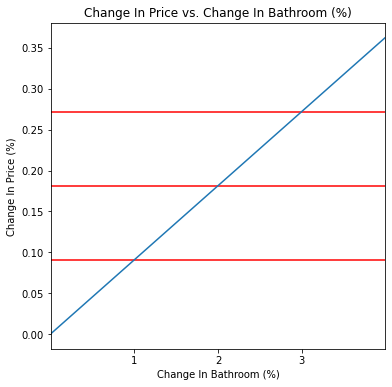

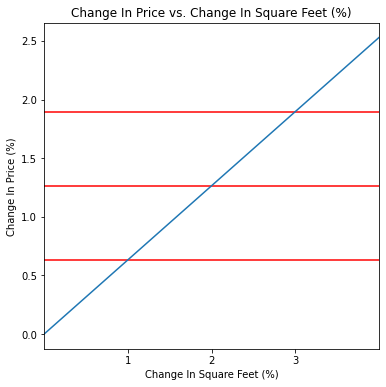

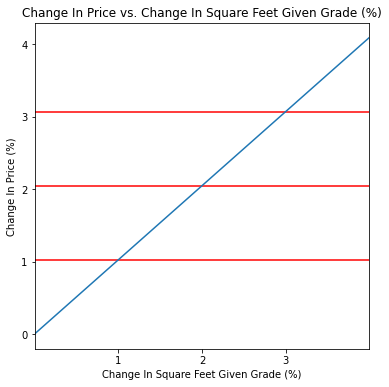

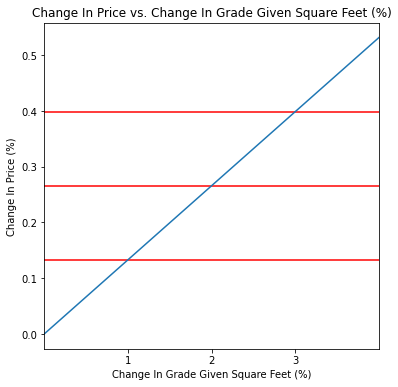

In [170]:
coeffs = [bathroom_coeff, sqft_coeff, sqft_given_grade_coeff, grade_given_sqft_coeff]

names = ['Bathroom', 'Square Feet', 'Square Feet Given Grade', 'Grade Given Square Feet']

coeffs_names = zip(coeffs, names)

for co, name in coeffs_names:
    
    fig, ax = plt.subplots(figsize = (6,6))
    x = [0,1,2,3,4]
    y = [(0*co), (1*co),(2*co), (3*co),(4*co)]
    
    ax.set_title(f'Change In Price vs. Change In {name} (%)')
    ax.set_xlabel(f'Change In {name} (%)')
    ax.set_ylabel(f'Change In Price (%)')
    ax.set_xticks([1,2,3])
    ax.set_xlim(0,4)
    #ax.set_ylim(0,4)
    #ax.set_yticks([np.arange()])
    for i in y[1:4]:
        ax.axhline(i, color='r',ls='-',mew=.2)

    plt.plot(x,y)
    plt.savefig(f'{name}.png');

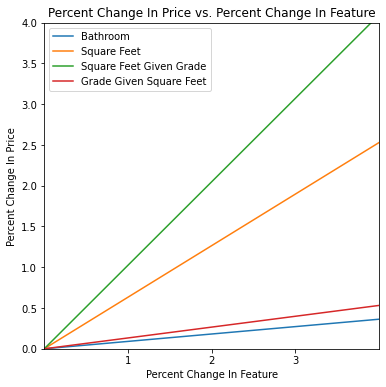

In [169]:
fig, ax = plt.subplots(figsize = (6,6))

ax.set_title(f'Percent Change In Price vs. Percent Change In Feature')
ax.set_xlabel(f'Percent Change In Feature')
ax.set_ylabel(f'Percent Change In Price')
ax.set_xticks([1,2,3])
ax.set_xlim(0,4)
ax.set_ylim(0,4)

    
    
x = [0,1,2,3,4]
y1 = [(0*coeffs[0]), (1*coeffs[0]), (2*coeffs[0]), (3*coeffs[0]), (4*coeffs[0])]
y2 = [(0*coeffs[1]), (1*coeffs[1]), (2*coeffs[1]), (3*coeffs[1]), (4*coeffs[1])]
y3 = [(0*coeffs[2]), (1*coeffs[2]), (2*coeffs[2]), (3*coeffs[2]), (4*coeffs[2])]
y4 = [(0*coeffs[3]), (1*coeffs[3]), (2*coeffs[3]), (3*coeffs[3]), (4*coeffs[3])]

line1, = plt.plot(x,y1)
line2, = plt.plot(x,y2)
line3, = plt.plot(x,y3)
line4, = plt.plot(x,y4);

ax.legend([line1,line2,line3,line4,], ['Bathroom', 'Square Feet', 'Square Feet Given Grade', 'Grade Given Square Feet'], loc = 'upper left')

plt.savefig('pirce_vs_features.png');

    